# Perceptron

In [1]:
import requests
import pandas as pd
from sklearn.datasets import load_svmlight_file
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Get Data - a4a

In [2]:
url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a4a"
download = requests.get(url)

with open("a4a", "wb") as file:
    file.write(download.content)
    X, y = load_svmlight_file("a4a")
    X = pd.DataFrame(X.todense())
    X["class"] = y

X = X.dropna()
random = X.sample(frac=1)
X = random
y = random["class"]
training = int(0.8 * len(random))
X_train, X_test = X[:training], X[training:]
y_train, y_test = y[:training], y[training:]

## Get Data - iris

In [3]:
url2 = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/iris.scale"
download2 = requests.get(url2)

with open("iris.scale", "wb") as file:
    file.write(download2.content)

    X2, y2 = load_svmlight_file("iris.scale")
    X2 = pd.DataFrame(X2.todense())
    X2["class"] = y2

X2 = X2.dropna()
random2 = X2.sample(frac=1)
X2 = random2
y2 = random2["class"]
training2 = int(0.8 * len(random2))
X_train2, X_test2 = X2[:training2], X2[training2:]
y_train2, y_test2 = y2[:training2], y2[training2:]

## Model

In [4]:
def activation(weight, inpt):
    result = np.dot(inpt, weight.T)
    if result > 0:
        return 1
    return -1

def perceptron(X, Y, lr, its):
    w = np.zeros(len(X[0]))
    correct = []
    misclassified = []
    for i in range(its):
        for j, x in enumerate(X):
            value = activation(w, X[j])
            if value != Y[j]:
                w = w + (lr*X[j]*Y[j])
                misclassified.append(value)
            else:
                correct.append(value)
                
    top_w = np.sort(w)[-20:][::-1]
    top_f = np.argsort(w)[-20:][::-1]
    plt.style.use('ggplot')
    plt.bar(top_f, top_w, color='green')
    plt.xlabel("Features")
    plt.ylabel("Weights")
    plt.title("Top Features and Weights")
    plt.show()
    
    print("In order of importance, the top features are: ", top_f)
    return misclassified, correct

## Metrics

In [5]:
def Metrics(incorr, corr):
    accuracy = (len(corr))/(len(corr)+len(incorr))
    precision1 = (corr.count(1))/(corr.count(1)+incorr.count(1))
    precision2 = (corr.count(-1))/(corr.count(-1)+incorr.count(-1))
    total_precision = (precision1+precision2)/2
    recall1 = (corr.count(1))/(corr.count(1)+incorr.count(-1))
    recall2 = (corr.count(-1))/(corr.count(-1)+incorr.count(1))
    total_recall = (recall1+recall2)/2
    f1_score = (2*(total_precision*total_recall))/(total_precision+total_recall)
    
    print("Accuracy: ", round(accuracy*100,2), "%")
    print("Precision: ", round(total_precision*100,2), "%")
    print("Recall: ", round(total_recall*100,2), "%")
    print("F1-score: ", round(f1_score*100,2), "%")

## Binary Classification

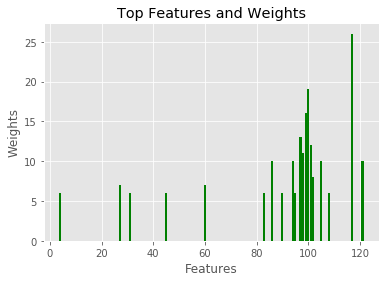

In order of importance, the top features are:  [117 100  99  97 101  98 121 105  86  94 102  27  60 108  83   4  90  95
  45  31]
Accuracy:  79.77 %
Precision:  72.68 %
Recall:  72.68 %
F1-score:  72.68 %


In [6]:
train_data = X_train.iloc[:,:-1]
train_data = train_data.values
mis, cor = perceptron(train_data, y_train.values, 1, 50)
Metrics(mis, cor)

## Multi-Class

### 1 vs 2 & 3

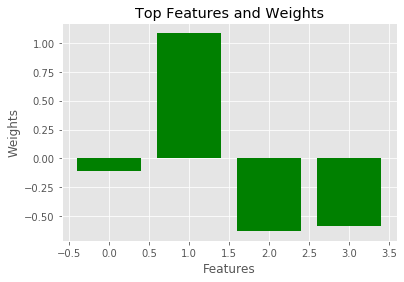

In order of importance, the top features are:  [1 0 3 2]
Accuracy:  99.95 %
Precision:  99.94 %
Recall:  99.95 %
F1-score:  99.95 %


In [7]:
y_train_data = y_train2.values
y_new1 = []
for i, j in enumerate(y_train_data):
    if y_train_data[i] == 1.0:
        y_new1.append(1.0)
    else:
        y_new1.append(-1.0)
        
train_data2 = X_train2.iloc[:,:-1]
train_data2 = train_data2.values
mis2, cor2 = perceptron(train_data2, y_new1, 1, 50)
Metrics(mis2, cor2)

### 2 vs 1 & 3

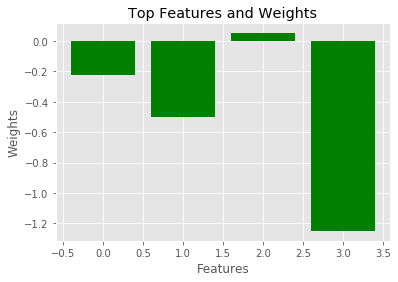

In order of importance, the top features are:  [2 0 1 3]
Accuracy:  63.12 %
Precision:  65.53 %
Recall:  68.26 %
F1-score:  66.87 %


In [8]:
y_new2 = []
for i, j in enumerate(y_train_data):
    if y_train_data[i] == 2.0:
        y_new2.append(1.0)
    else:
        y_new2.append(-1.0)
mis4, cor4 = perceptron(train_data2, y_new2, 1, 50)
Metrics(mis4, cor4)

### 3 vs 2 & 1

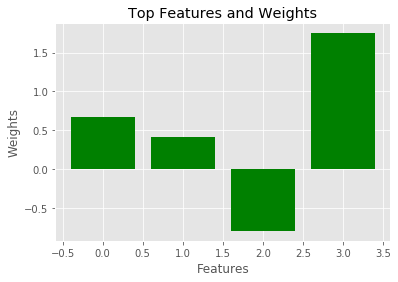

In order of importance, the top features are:  [3 0 1 2]
Accuracy:  85.58 %
Precision:  84.16 %
Recall:  86.81 %
F1-score:  85.46 %


In [9]:
y_new3 = []
for i, j in enumerate(y_train_data):
    if y_train_data[i] == 3.0:
        y_new3.append(1.0)
    else:
        y_new3.append(-1.0)

mis5, cor5 = perceptron(train_data2, y_new3, 1, 50)
Metrics(mis5, cor5)